# Step 1.1) Load Libraries¶
Import all necessary libraries for the project.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1.2) Load the dataset
Load the dataset and display the first few rows.

In [22]:
df = pd.read_csv("housing.csv")
df.head()
#df.shape

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


# Step 2.1) Descriptive Statistics
Generate summary statistics for the dataset.

In [13]:
summary = df.describe()
print(summary)

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562390             5.322283                   6.299250   
50%        68804.286405             5.970429                   7.002902   
75%        75783.338665             6.650808                   7.665871   
max       107701.748400             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.61

# Step 2.2) Data Visualizations
Visualize the data to identify patterns and relationships.

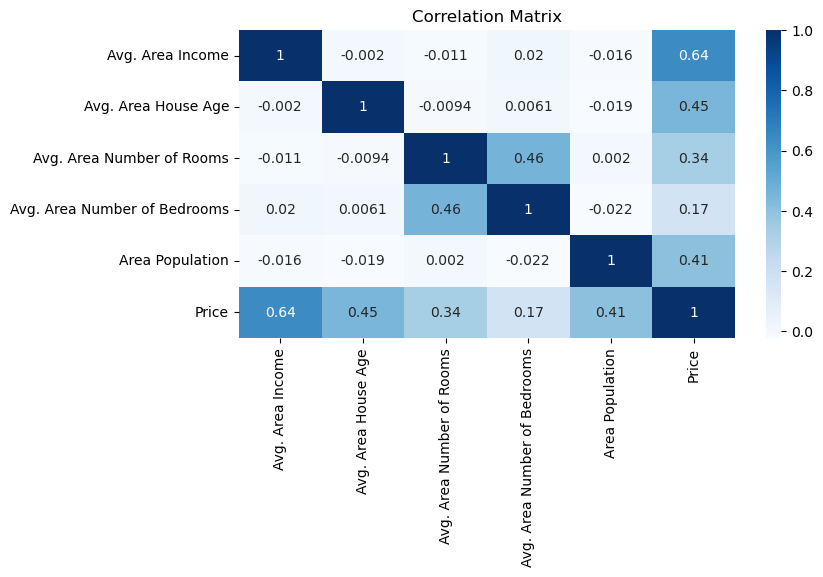

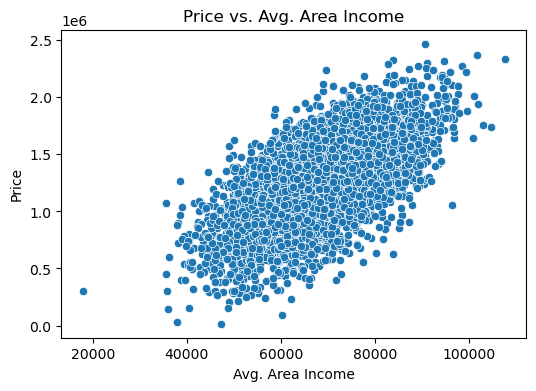

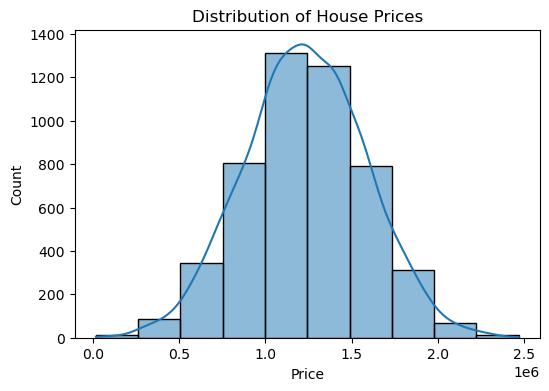

In [5]:
df_numeric = df.drop("Address", axis=1)
# Heatmap - 
plt.figure(figsize=(8, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

# Scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Avg. Area Income', y='Price', data=df_numeric)
plt.title("Price vs. Avg. Area Income")
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_numeric['Price'], bins=10, kde=True)
plt.title("Distribution of House Prices")
plt.show()


# Step 3.1 Clean Data
 Handle Missing Value

In [7]:
df.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [15]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    outlier_summary[col] = {
        'Outlier Count': outlier_count,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='Outlier Count', ascending=False)
print(outlier_df)


                              Outlier Count    Lower Bound   Upper Bound
Price                                  35.0  287127.530937  2.181660e+06
Avg. Area Income                       32.0   40026.397978  9.723750e+04
Area Population                        30.0    9217.885595  6.304733e+04
Avg. Area House Age                    25.0       3.329495  8.643597e+00
Avg. Area Number of Rooms              24.0       4.249318  9.715803e+00
Avg. Area Number of Bedrooms            0.0       1.115000  6.515000e+00


In [17]:
for col in outlier_df.index:
    lower = outlier_df.loc[col, 'Lower Bound']
    upper = outlier_df.loc[col, 'Upper Bound']
    df = df[(df[col] >= lower) & (df[col] <= upper)]


# Step 3.1) Feature Selection¶
Select the most relevant features for the model.

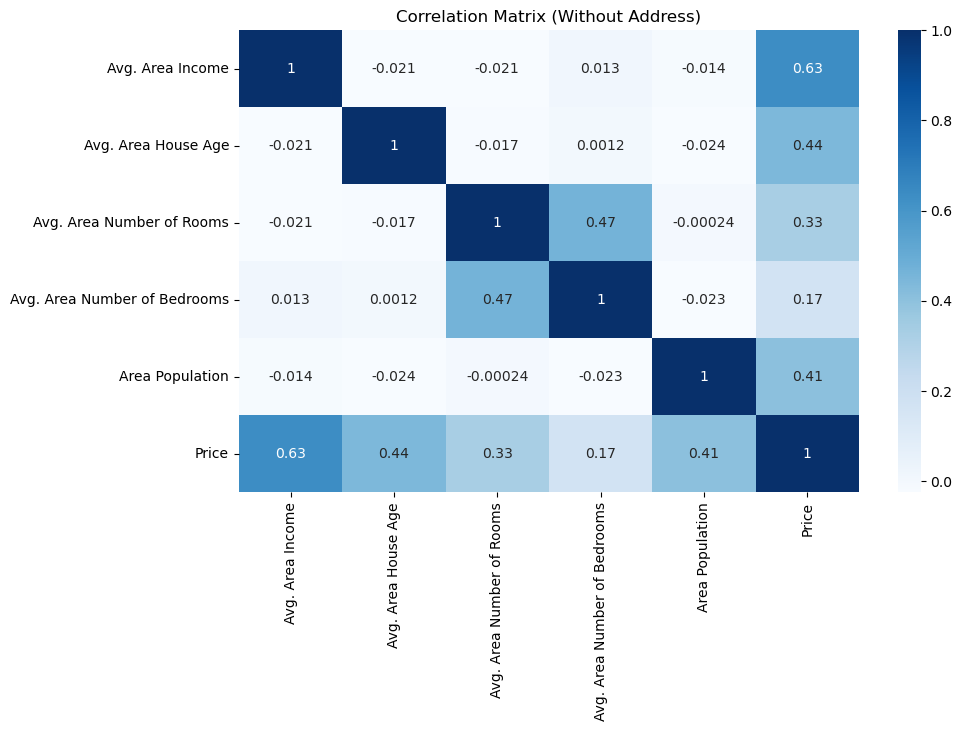

Price                           1.000000
Avg. Area Income                0.632031
Avg. Area House Age             0.441675
Area Population                 0.406027
Avg. Area Number of Rooms       0.329630
Avg. Area Number of Bedrooms    0.168606
Name: Price, dtype: float64
                        Feature  Importance
0              Avg. Area Income    0.430858
1           Avg. Area House Age    0.232575
4               Area Population    0.189586
2     Avg. Area Number of Rooms    0.129595
3  Avg. Area Number of Bedrooms    0.017386


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# حذف Address قبل حساب الارتباط
correlation = df.drop(columns=['Address']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.title("Correlation Matrix (Without Address)")
plt.show()

# نطبع الارتباط مع السعر فقط
print(correlation['Price'].sort_values(ascending=False))

from sklearn.ensemble import RandomForestRegressor

# X = جميع الميزات ما عدا السعر والعنوان
X = df.drop(columns=['Price', 'Address'])
y = df['Price']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# استخراج أهمية كل ميزة
importances = model.feature_importances_

# عرض النتائج
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)
